# Gradient Boosting (classifier and regression)

<center>Resources</center>
http://cs229.stanford.edu/notes/cs229-notes-ensemble.pdf

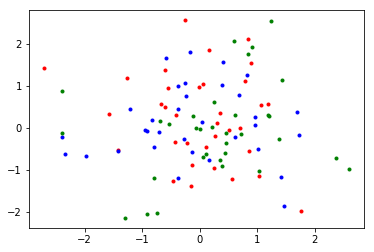

(100, 20)
2
(100,)


In [18]:
# From https://stackoverflow.com/a/47964170/13112355

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

separable = False
while not separable:
    samples = make_classification(n_samples=100, n_classes = 3, n_clusters_per_class=1, flip_y=-1, class_sep = 0)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    green = samples[0][samples[1] == 2]
    separable = True
    #separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(green[:, 0], green[:, 1], 'g.')
plt.show()

# Our dataset
print(samples[0].shape)
print(max(samples[1]))
print(samples[1].shape)

In [ ]:
# bagging



In [5]:
# idea: decision trees

def train_tree():
    def cross_entropy(yHat, y):
        
    

SyntaxError: unexpected EOF while parsing (<ipython-input-5-84c383d00ad5>, line 5)

### 1. Type of Data
*

### 2. Use Case
*

### 3. Application
*

### 4. Basic Concept
*

### 5. Assumptions
*

### 6. Existing solutions
*

### 7. Strengths and Weaknesses
#### Strengths
*

#### Weaknesses
*